# Machine Learning Models

The goal of this workbook is to compare different machine learning models on our dataset and compare their results. We are looking to see which models perform best on our dataset and which can most accurately be used to predict new data.

In this workbook we will load our cleaned csv from our ETL process, then compare the following models:
    - Logistic Regression
    - K Nearest Neighbor
    - Random Forest
    - Neural Network
    
After analyizing each of these models to see which is the best predictor, we will use a <b>Correlation Matrix</b> in order to see which of the input factors from our data has the best predictive power. This is an additional path our group wanted to go down to gain more insight into our data.
    
` While there are plenty of other machine learning models we could have explored, these are the handful that our team was most interested in experimenting with. In addition, our team selected these models as we believe they have a high likelyhood to be effective considering the nature of our dataset and predictive goals. `

In [1]:
# Import General Dependencies for this Workbook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [3]:
# Set file path to the cleaned data csv from data cleanup process
file = "data"

# Read to a df
data_df = pd.read_csv(file)
data_df.head()

,age,workclass,fnlwgt,education,education_number,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
print (data_df)
print (data_df.dtypes)

       age          workclass  fnlwgt    education  education_number  \
0       39          State-gov   77516    Bachelors                13   
1       50   Self-emp-not-inc   83311    Bachelors                13   
2       38            Private  215646      HS-grad                 9   
3       53            Private  234721         11th                 7   
4       28            Private  338409    Bachelors                13   
...    ...                ...     ...          ...               ...   
32556   27            Private  257302   Assoc-acdm                12   
32557   40            Private  154374      HS-grad                 9   
32558   58            Private  151910      HS-grad                 9   
32559   22            Private  201490      HS-grad                 9   
32560   52       Self-emp-inc  287927      HS-grad                 9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-famil

# ------------------------------

# Start Emerson Code

## Logistic Regression

Logistic Regression is a statistical method for predicting binary outcomes from data.

In [5]:
# The data contains the "income", stating rather an individual earns less than $50k or more than $50k. 
# Removing the "income" from the input set in order to not provide the model with the correct answer. 
# Assign X (data) and y (target)
X = data_df.drop("income", axis=1)
y = data_df["income"]
print(X.shape, y.shape)

(32561, 14) (32561,)


In [6]:
X = pd.get_dummies(X)

In [7]:
# Split the data into a training (75% of values) and testing (25% of values) split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
# Generate the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [9]:
# Fit the model
classifier.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Train the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.793980343980344
Testing Data Score: 0.8073946689595872


Predict with new data

In [11]:
# Predict the class examples
predictions = classifier.predict(X_test)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {predictions}")

Classes are either 0 (purple) or 1 (yellow)
The new point was classified as: [' <=50K' ' <=50K' ' >50K' ... ' <=50K' ' <=50K' ' <=50K']


In [12]:
# Predict into a df
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
9646,<=50K,<=50K
709,<=50K,<=50K
7385,>50K,>50K
16671,<=50K,<=50K
21932,<=50K,<=50K
...,...,...
31540,<=50K,<=50K
18566,<=50K,>50K
13141,<=50K,<=50K
14286,<=50K,<=50K


## K Nearest Neighbors (KNN) Model

In [13]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [14]:
# Set file path to the cleaned data csv from data cleanup process
file = "data"

# Read to a df
data_df = pd.read_csv(file)
data_df.head()

,age,workclass,fnlwgt,education,education_number,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
# setting "y" to income 
y = data_df["income"]
target_names = ["negative", "positive"]

In [16]:
# dropping "income" from the data as this has the correct answer 
X = data_df.drop("income", axis=1)
X.head()

,age,workclass,fnlwgt,education,education_number,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [17]:
X = pd.get_dummies(X)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [20]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

k: 1, Train/Test Score: 1.000/0.795
k: 3, Train/Test Score: 0.895/0.816
k: 5, Train/Test Score: 0.875/0.825
k: 7, Train/Test Score: 0.863/0.829


In [ ]:
# Note that K: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=43)
knn.fit(X_train_scaled, y_train)
print('k=43 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

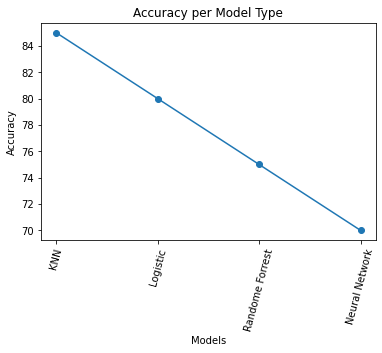

In [2]:
# line chart 
x_values = ["KNN", "Logistic", "Randome Forrest", "Neural Network"]
y_values = [85, 80, 75, 70]
plt.xticks(rotation=75)
plt.plot(x_values,y_values, marker="o")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy per Model Type")
plt.show()

# End Emerson Code

# ------------------------------

# Start Sofanit Code

## Random Forest Model

## Neural Network Model

# End Sofanit Code

# ------------------------------

## Correlation Matrix